# Projet 5 - Catégorisez automatiquement des questions

## Importation des librairies et des données et conversions

In [1]:
import numpy as np
import pandas as pd
import gensim
import scipy
from sklearn.decomposition import LatentDirichletAllocation
import csv
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix
import joblib

In [2]:
test_mx = pd.read_csv('test_mx.csv', sep=';', index_col=0)
train_mx = pd.read_csv('train_mx.csv', sep=';', index_col=0)
fw_dict = pd.read_csv('fw_dict.csv')
test_df = pd.read_csv('processed_test_df.csv', sep=';',
                      index_col=0, converters={'processed_tags': eval})
train_df = pd.read_csv('processed_train_df.csv', sep=';',
                       index_col=0, converters={'processed_tags': eval})

In [3]:
feature_name = []
with open('feature_name.csv', 'r') as data:
    for line in csv.reader(data):
        feature_name.append(line)

# Transforme la liste de listes en liste
feature_names = [item for sublist in feature_name for item in sublist]

In [4]:
fw_dict = fw_dict.to_dict(orient='list')

In [5]:
train_mx

,able,accept,access,according,account,achieve,across,action,active,activity,...,xcode,xml,xmlns,year,yes,yet,z,zero,zip,zygoteinit
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.115881,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.18369,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34871,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
34872,0.000000,0.000000,0.081002,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
34873,0.000000,0.235645,0.000000,0.108872,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
34874,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [6]:
train_feature = scipy.sparse.csr_matrix(train_mx.values)

In [7]:
train_feature

<34876x977 sparse matrix of type '<class 'numpy.float64'>'
	with 1051739 stored elements in Compressed Sparse Row format>

## LDA

In [8]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(train_feature)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=11, random_state=0)

In [9]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [10]:
n_top_words = 40
print("\nTopics in LDA model: ")
print_top_words(lda, feature_names, n_top_words)


Topics in LDA model: 
Topic #0:
use javascript using would page like code way file j know html browser c jquery function window application one google need example time want image work question good java find script web chrome event used user library get net looking
Topic #1:
public thread class method exception static void task java catch private new system difference async throw test interface null println try return string block queue object code main call e final instance wait console boolean writeline args run override int
Topic #2:
java android org jar eclipse com gradle maven spring annotation dependency hibernate lang junit xml bean compile build support google plugin apache sun class project util internal springframework version activitythread servlet jdk test http main error source property v groupid
Topic #3:
android view layout button image activity app self color intent item text id io screen height swift fragment want width parent r background set change textview action 

## ACP

On extrait le 1er tag de chaque ligne pour créer 'y' de la base train et test. Il faut encoder les données sur le dataframe contenant toutes les données pour éviter des problèmes liés avec des tags qui apparaissent dans une base et non l'autre

### LabelEncoder

In [8]:
full_df = pd.concat([train_df, test_df])
pre_base = [full_df['processed_tags'].iloc[i][0]
            for i in range(len(full_df['processed_tags']))]
le = preprocessing.LabelEncoder()
le.fit(pre_base)

LabelEncoder()

In [9]:
pre_ytrain = [train_df['processed_tags'].iloc[i][0]
              for i in range(len(train_df['processed_tags']))]
y_train = le.transform(pre_ytrain)

In [10]:
pre_ytest = [test_df['processed_tags'].iloc[i][0]
             for i in range(len(test_df['processed_tags']))]
y_test = le.transform(pre_ytest)

In [11]:
# Normalisation de la base train
std_scale = preprocessing.StandardScaler().fit(train_mx)
X_scaled = std_scale.transform(train_mx)

In [12]:
# Normalisation de la base test selon la base test
X_scaled_test = std_scale.transform(test_mx)

On test l'ACP avec plusieurs nombres de composants

In [13]:
# On calcul les 2 premieres composantes principales
pca = decomposition.PCA(n_components=800)
pca.fit(X_scaled)

# projeter X sur les composantes principales
train_projected = pca.transform(X_scaled)

In [14]:
test_projected = pca.transform(X_scaled_test)

In [15]:
# Pourcentage de la variance expliquee
# print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

0.8925587586009399


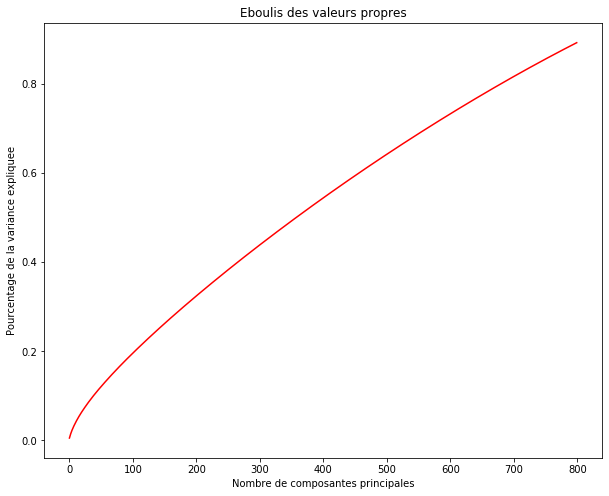

In [16]:
plt.figure(figsize=(10, 8))
scree = pca.explained_variance_ratio_*100
#plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree)), np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Pourcentage de la variance expliquee')
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On enregistre les composantes dans une variable qui devient le nouveau x_train

In [17]:
train_projected.shape

(34876, 800)

## V1 - Modélisation

Nous allons tester trois modèles différents pour trouver celui ayant la meilleure précision. Les trois modèles choisis sont:
- l'arbre de décision
- le modèle logisitique
- la SVM

Cette première version est simplement un premier jet, les versions suivantes sont plus travaillées et utiles

### Arbre de décision

In [21]:
X_scaled.shape

(34876, 977)

In [22]:
y_train.shape

(34876,)

In [23]:
tree_class = DecisionTreeClassifier()
scores = cross_validate(estimator=tree_class, X=train_projected, y=y_train, cv=5, scoring=(
    'accuracy'), return_train_score=True)

scores

C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([102.06740141, 102.67597294, 109.02975059, 104.48239422,
        103.40116   ]),
 'score_time': array([0.03195596, 0.02400041, 0.02400041, 0.02453303, 0.02403855]),
 'test_score': array([0.38704128, 0.38308244, 0.37749104, 0.39268817, 0.38566308]),
 'train_score': array([0.99989247, 0.99992832, 0.99992832, 0.99992832, 0.99992832])}

In [25]:
#print('Accuracy moyenne pour data train:', scores['train_accuracy'].mean())

#print('Accuracy moyen pour data test:', scores['test_accuracy'].mean())

In [26]:
debut = time.time()
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_projected, y_train)
fin = time.time()
print('Accuracy avec modèle: Arbre de décision:',
      decision_tree.score(test_projected, y_test))
print(fin-debut)

Accuracy avec modèle: Arbre de décision: 0.39358736059479554
144.60286808013916


### Modèle logistique

In [27]:
type(y_train)

numpy.ndarray

In [ ]:
model = LogisticRegression()
parameters = {'penalty': ['none'], 'C': [
    0.01, 1, 100], 'max_iter': [1000]}
gs_reglog = GridSearchCV(model, parameters, scoring=(
    'accuracy'), refit='r2', cv=5)
gs_reglog.fit(train_projected, y_train)

In [ ]:
modele_logit = LogisticRegression(penalty='none')
modele_logit.fit(train_projected, y_train)

### SVM

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_scaled, y_train)

## V2 - Modélisation sur un échantillon

Pour tester le bon fonctionnement des modèles, nous avons sélectionné les 10 000 première valeurs de X et Y afin de pouvoir faire tourner les algorithmes plus facilement. Cependant le résultat de ces tests là ne sont pas pris en compte dans le choix du modèle final.

In [30]:
X = train_projected[:10000]
y = y_train[:10000]

### Arbre de décision

In [31]:
tree_class = DecisionTreeClassifier()
tree_class.fit(X, y)

DecisionTreeClassifier()

In [32]:
y_pred = tree_class.predict(test_projected[:10000])

print(f1_score(y_test[:10000], y_pred, average='micro'))
print(precision_score(y_test[:10000], y_pred, average="macro"))
print(recall_score(y_test[:10000], y_pred, average="macro"))
print(classification_report(y_test[:10000], y_pred))

0.35931691449814124
0.08591997447324211
0.08637855735368614
              precision    recall  f1-score   support

           0       0.03      0.03      0.03       106
           3       0.00      0.00      0.00         3
           5       0.47      0.46      0.46       800
          10       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          23       0.14      0.15      0.15       197
          24       0.30      0.26      0.28      1033
          26       0.46      0.46      0.46       621
          27       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         0
          33       0.30      0.24      0.27       173
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         4
          37       0.00      0.00      0.00         1
          38       0.

C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: Undef

### Régression logistique

In [33]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [34]:
y_pred = log_reg.predict(test_projected[:10000])

print(f1_score(y_test[:10000], y_pred, average='micro'))
print(precision_score(y_test[:10000], y_pred, average="macro"))
print(recall_score(y_test[:10000], y_pred, average="macro"))
print(classification_report(y_test[:10000], y_pred))

0.6011849442379182
0.18664315696661823
0.18687764274111676
              precision    recall  f1-score   support

           0       0.13      0.17      0.15       106
           3       0.00      0.00      0.00         3
           5       0.63      0.64      0.64       800
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         1
          23       0.38      0.40      0.39       197
          24       0.62      0.57      0.59      1033
          26       0.61      0.62      0.61       621
          33       0.41      0.29      0.34       173
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         4
          37       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         7
          40       0.0

C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: Undef

### SVM

In [35]:
svm = SVC()
svm.fit(X, y)

SVC()

In [36]:
y_pred = svm.predict(test_projected[:10000])

print(f1_score(y_test[:10000], y_pred, average='micro'))
print(precision_score(y_test[:10000], y_pred, average="macro"))
print(recall_score(y_test[:10000], y_pred, average="macro"))
print(classification_report(y_test[:10000], y_pred))

0.6442843866171004
0.27631817799096065
0.19266478030209178
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       106
           3       0.00      0.00      0.00         3
           5       0.71      0.76      0.73       800
          13       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         1
          23       0.69      0.17      0.28       197
          24       0.55      0.71      0.62      1033
          26       0.71      0.66      0.68       621
          33       0.46      0.14      0.21       173
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         4
          37       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         7
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         2
          46       0.00      0.00      0.00         1
          48       0.0

C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modélisation sur toutes les données

### Tests sur google colab

Le jeu de données étant très important, j'ai rencontré des difficultées à faire tourner ces codes sur jupyter. J'ai donc fait certains tests sur google colab en utilisant le GPU. Pour pouvoir faire cela, il m'a fallu transférer les données sur google colab et vérifier leur forme et leur taille.

In [21]:
X = train_projected
y = y_train

In [22]:
print(X.shape)
print(y.shape)
print(test_projected.shape)
print(y_test.shape)

(34876, 800)
(34876,)
(8608, 800)
(8608,)


In [23]:
print('X:', X)
print('y:', y)
print('test_projected:', test_projected)
print('y_test:', y_test)

X: [[-1.54483905e+00  1.40083500e+00  2.09303001e-01 ...  5.95326544e-01
  -1.49504499e+00  1.88269706e-03]
 [ 1.94528506e+00  3.70442646e+00  1.60432818e+00 ... -8.55249506e-01
   4.42822787e-01 -4.55148339e-01]
 [-1.50849740e+00  1.05434131e+00 -1.39288707e+00 ... -8.27174283e-01
   1.54222195e-01 -3.92614353e-01]
 ...
 [-1.16020402e+00 -1.43050418e+00  1.24224145e+00 ... -9.59776741e-01
   3.68352733e-01  6.73205581e-01]
 [-1.95723822e+00  2.50974079e+00 -4.69779461e-01 ... -1.24035355e+00
  -3.38761822e-01  1.00341782e+00]
 [-1.00379294e+00  8.07275756e+00  3.20417663e+00 ...  3.32758555e-01
   3.38913789e-01  7.86003475e-01]]
y: [70  5 49 ... 90 24 70]
test_projected: [[-4.06875168e-01 -1.53030168e+00  1.17995040e+00 ... -3.62408619e-01
  -1.21246430e+00  3.33093006e-01]
 [ 5.87253361e+00 -9.78786830e-01 -3.54447288e+00 ...  6.80748976e-01
  -9.76319228e-01 -2.99488660e-01]
 [ 3.33907724e+00 -9.74049512e-01  6.65564624e-01 ... -1.30880693e+00
  -1.40185833e+00  7.36984024e-03]
 ..

In [44]:
# Sauvegarde des données pour utiliser dans google colab
np.savetxt('X.csv', X, delimiter=',', fmt='%d', header='Values')
np.savetxt('Y.csv', y, delimiter=',', fmt='%d', header='Values')
np.savetxt('test_proj.csv', test_projected,
           delimiter=',', fmt='%d', header='Values')
np.savetxt('y_test.csv', y_test, delimiter=',', fmt='%d', header='Values')

### Choix du modèle

#### Arbre de décision

In [24]:
debut_tree = time.time()

tree_class = DecisionTreeClassifier()
tree_class.fit(X, y)

y_pred = tree_class.predict(test_projected)

fin_tree =  time.time()
print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))
print("Temps d'exécution: ", fin_tree - debut_tree)

0.3888243494423792
0.09122714429293237
0.09171257460604516
              precision    recall  f1-score   support

           0       0.07      0.08      0.08       106
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.51      0.51      0.51       800
           9       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         1
          23       0.24      0.23      0.24       197
          24       0.35      0.34      0.35      1033
          26       0.49      0.46      0.48       621
          33       0.23      0.24      0.23       173
          34       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         4
          37       0.00      0.00      0.00         1
          38       0.0

C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: Undef

#### Régression logistique

In [25]:
debut_reg = time.time()

log_reg = LogisticRegression()
log_reg.fit(X, y)
y_pred = log_reg.predict(test_projected)

fin_reg = time.time()
print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))
print("Temps d'exécution: ", fin_reg - debut_reg)

0.6780901486988847
0.22654798314536978
0.21207425189923196
              precision    recall  f1-score   support

           0       0.20      0.16      0.18       106
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         3
           5       0.81      0.78      0.79       800
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          23       0.49      0.48      0.48       197
          24       0.67      0.67      0.67      1033
          26       0.71      0.68      0.70       621
          33       0.51      0.45      0.48       173
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         4
          37       0.00      0.00      0.00         1
          38       1.00      0.14      0.25         7
          40       0.00      0.00      0.00         1
          41       0.0

C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with n

#### SVM

In [ ]:
debut_svm = time.time()

svm = SVC()
svm.fit(X, y)
y_pred = svm.predict(test_projected)

fin_svm = time.time()
print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))
print("Temps d'éxecution: ", fin_svm - debut_svm)

## Modèle choisi

Le meilleur score est atteint avec la SVM (accuracy = 0,69). Cependant, du au temps d'exécution trop long, le modèle choisi est la régression logistique avec un score accuracy de 0,68 avec les paramètres par défaut suivants: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}.

### Tuning des paramètres : GridSearchCV V1

In [22]:
param_grid = {
    'penalty': ['l1', 'none'],
    'C': [1, 10, 100],
    'max_iter': [100, 500]
}

In [26]:
model = LogisticRegression()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring="accuracy", verbose=2, n_jobs=-1)

best_model = grid_search.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 132.8min finished
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
grid_search.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'none'}

In [28]:
grid_search.best_score_

0.7078984122716542

### Tuning des paramètres : GridSearchCV V2

In [64]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10],
    'max_iter': [100, 1000]
}
model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring="accuracy", verbose=2, n_jobs=-1)
best_model = grid_search.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 117.1min finished
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [65]:
grid_search.best_params_

{'C': 1, 'max_iter': 1000, 'penalty': 'l2'}

In [66]:
grid_search.best_score_

0.7104861373516822

### Tuning des paramètres : GridSearchCV V3

In [ ]:
param_grid = {
    'penalty': ['l2', 'none'],
     'C': np.logspace(-2,2,5),
    'max_iter': [50,100]
}
model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy", verbose=2, n_jobs=-1)
best_model = grid_search.fit(X, y)

Meilleurs paramètres: {'C': 0.01, 'max_iter': 50, 'penalty': 'l2'}

Meilleur score: 0.670891194797935

### Tuning des paramètres : GridSearchCV V4

In [ ]:
param_grid = {
    'penalty': ['l2', 'none'],
     'C': np.logspace(-1,2,4),
    'max_iter': [100,1000]
}
model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy", verbose=2, n_jobs=-1)
best_model = grid_search.fit(X, y)

Meilleurs paramètres: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}
Meilleur score: 0.6458596765972839

### Paramètres choisis

Après avoir testé différents paramètres, le meilleur score reste celui obtenu avec les paramètres par défaut du modèle.

## Validation du modèle

In [20]:
X_train = train_projected

In [22]:
model_final = LogisticRegression()
model_final.fit(X_train, y_train)

y_pred = model_final.predict(test_projected)
print(classification_report(y_test, y_pred))

C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.20      0.16      0.18       106
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         3
           5       0.81      0.78      0.79       800
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          23       0.49      0.48      0.48       197
          24       0.67      0.67      0.67      1033
          26       0.71      0.68      0.70       621
          33       0.51      0.45      0.48       173
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         4
          37       0.00      0.00      0.00         1
          38       1.00      0.14      0.25         7
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         2
          44       0.00    

C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
joblib.dump(model_final, 'model_final.plk')

['model_final.plk']